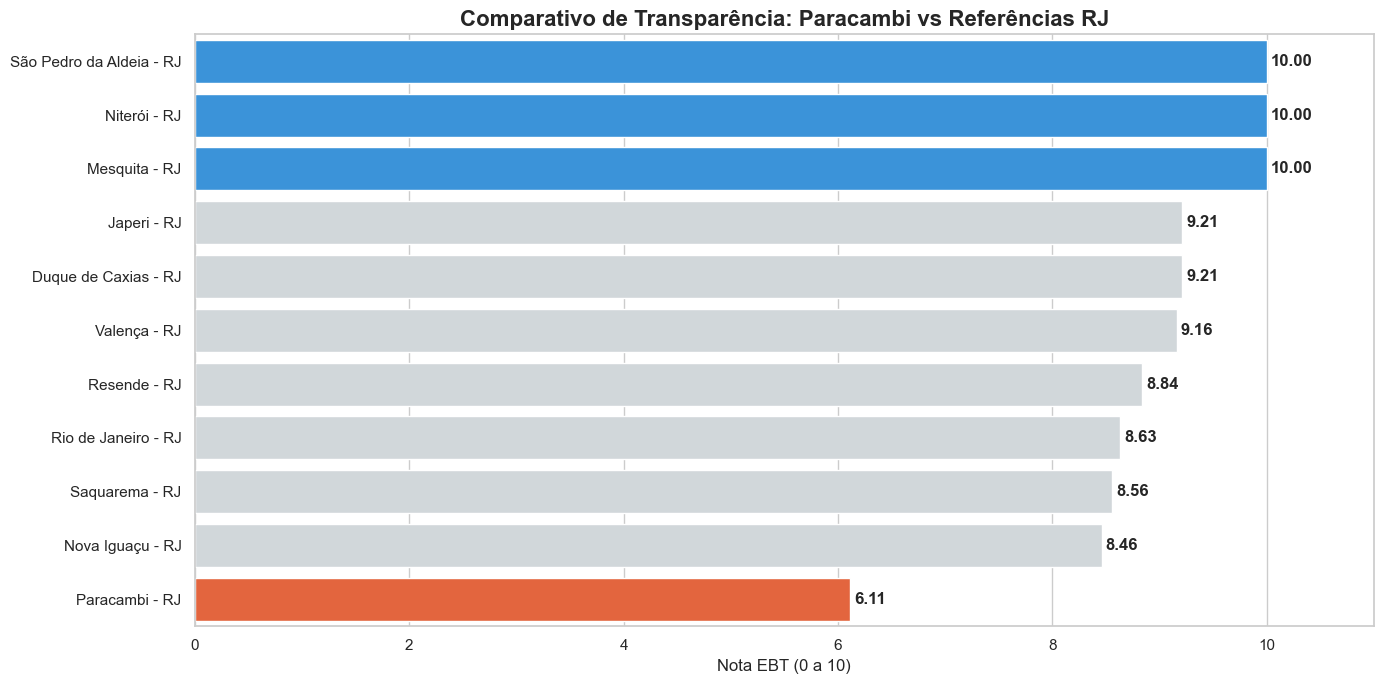

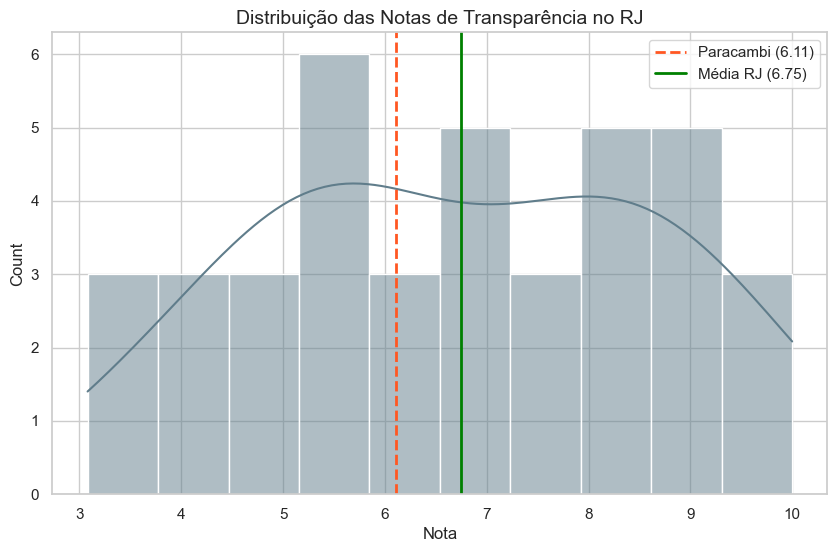


📝 RESUMO EXECUTIVO PARA O GESTOR:
1. Posição Atual: Paracambi está em 22º lugar no RJ.
2. Nota: 6.11 (Média do Estado é 6.75).
3. Status: A cidade está ABAIXO da média estadual.
4. O Gap: Faltam 3.89 pontos para alcançar a excelência (Nota 10) de Mesquita e Niterói.



In [4]:
%matplotlib inline 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. CARGA DOS DADOS LIMPOS
# ==========================================
# Agora lemos direto do CSV processado (muito mais rápido)
DATA_PATH = '../data/processed/rj_ebt_limpo.csv'
df = pd.read_csv(DATA_PATH)

# Configuração de Estilo (Deixando bonito para o relatório)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamanho da imagem

# ==========================================
# 2. PREPARAR DADOS PARA O GRÁFICO
# ==========================================
# Vamos pegar o TOP 10 + Paracambi (para não plotar 39 barras e ficar ilegível)
top_10 = df.head(10).copy()
paracambi = df[df['is_paracambi'] == 'Sim'].copy()

# Se Paracambi não estiver no Top 10, adicionamos ele manualmente para comparação
if paracambi.iloc[0]['municipio'] not in top_10['municipio'].values:
    plot_data = pd.concat([top_10, paracambi]).sort_values(by='nota', ascending=False)
else:
    plot_data = top_10

# ==========================================
# 3. GRÁFICO 1: O RANKING (BARRAS)
# ==========================================
plt.figure(figsize=(14, 7))

# Criar paleta de cores lógica: 
# Cinza = Outros, Azul = Top 3, Laranja = Paracambi
colors = []
for mun in plot_data['municipio']:
    if 'Paracambi' in str(mun):
        colors.append('#FF5722') # Laranja forte (Foco/Alerta)
    elif mun in df.head(3)['municipio'].values:
        colors.append('#2196F3') # Azul (Referência/Meta)
    else:
        colors.append('#CFD8DC') # Cinza claro (Contexto)

# Plotar
ax = sns.barplot(x='nota', y='municipio', data=plot_data, palette=colors, hue='municipio', legend=False)

# Adicionar os números nas barras (Data Labels)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3, fontweight='bold')

plt.title('Comparativo de Transparência: Paracambi vs Referências RJ', fontsize=16, fontweight='bold')
plt.xlabel('Nota EBT (0 a 10)', fontsize=12)
plt.ylabel(None)
plt.xlim(0, 11) # Trava o eixo X até 11 para dar respiro

# Salvar gráfico em alta resolução para seu slide/portfólio
plt.tight_layout()
plt.savefig('../data/processed/grafico_ranking_paracambi.png', dpi=300)
plt.show()

# ==========================================
# 4. GRÁFICO 2: ONDE ESTAMOS? (HISTOGRAMA)
# ==========================================
plt.figure(figsize=(10, 6))

# Desenha a curva de distribuição das notas do RJ
sns.histplot(df['nota'], bins=10, kde=True, color='#607D8B', alpha=0.5)

# Adiciona uma linha vertical onde Paracambi está
nota_paracambi = paracambi['nota'].values[0]
plt.axvline(nota_paracambi, color='#FF5722', linestyle='--', linewidth=2, label=f'Paracambi ({nota_paracambi})')

# Adiciona linha da Média do Estado
media_rj = df['nota'].mean()
plt.axvline(media_rj, color='green', linestyle='-', linewidth=2, label=f'Média RJ ({media_rj:.2f})')

plt.title('Distribuição das Notas de Transparência no RJ', fontsize=14)
plt.xlabel('Nota')
plt.legend()
plt.savefig('../data/processed/grafico_distribuicao.png', dpi=300)
plt.show()

# ==========================================
# 5. INSIGHTS AUTOMÁTICOS (TEXTO PARA RELATÓRIO)
# ==========================================
gap_lider = 10.0 - nota_paracambi
status = "ACIMA" if nota_paracambi > media_rj else "ABAIXO"

print(f"""
📝 RESUMO EXECUTIVO PARA O GESTOR:
1. Posição Atual: Paracambi está em {paracambi['ranking_estadual'].values[0]}º lugar no RJ.
2. Nota: {nota_paracambi} (Média do Estado é {media_rj:.2f}).
3. Status: A cidade está {status} da média estadual.
4. O Gap: Faltam {gap_lider:.2f} pontos para alcançar a excelência (Nota 10) de Mesquita e Niterói.
""")